Инжиниринг численных признаков

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
prsa_data = pd.read_csv("PRSA_Data.csv")
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,-1.0,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,-1.0,-1.000000,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,-1.0,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


In [ ]:
prsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35064 non-null  int64  
 1   No          35064 non-null  int64  
 2   SO2         35064 non-null  float64
 3   NO2         35064 non-null  float64
 4   CO          35064 non-null  float64
 5   O3          35064 non-null  float64
 6   PRES        35064 non-null  float64
 7   RAIN        35064 non-null  float64
 8   wd          35064 non-null  object 
 9   WSPM        35064 non-null  float64
 10  AQI Label   35064 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 2.9+ MB


In [ ]:
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17531.500000,17532.500000,18.058734,63.236861,1251.121692,45.876835,1010.520250,0.067653,1.500217
std,10122.249256,10122.249256,22.558126,39.109232,1269.033556,54.730861,26.289217,0.896833,1.105382
min,0.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,8765.750000,8766.750000,4.000000,34.000000,500.000000,2.397428,1002.500000,0.000000,0.800000
50%,17531.500000,17532.500000,10.000000,58.000000,900.000000,27.356346,1010.800000,0.000000,1.200000
75%,26297.250000,26298.250000,22.276800,87.000000,1500.000000,69.548316,1019.400000,0.000000,2.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,72.500000,11.200000


Заменимм -1 на nan

In [ ]:
prsa_data[prsa_data == -1] = np.nan
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,RAIN,wd,WSPM,AQI Label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,0.0,NNW,4.4,Severely Polluted
1,1,2,6.0,28.0,400.0,50.403851,1023.2,0.0,N,4.7,Severely Polluted
2,2,3,NaN,19.0,400.0,54.923321,1023.5,0.0,NNW,5.6,Severely Polluted
3,3,4,8.0,14.0,NaN,NaN,1024.5,0.0,NW,3.1,Excellent
4,4,5,9.0,NaN,300.0,54.296608,1025.2,0.0,N,2.0,Heavily Polluted


Визуализация распределения атрибутов

Здесь мы видим, какие значения концентрации SO2 присутствуют в датасете:

<Axes: xlabel='SO2', ylabel='Count'>

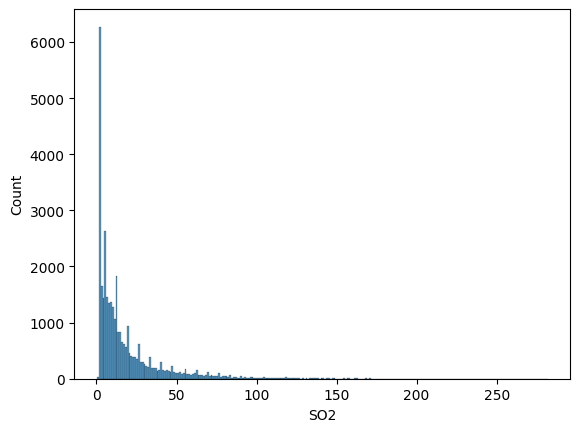

In [ ]:
sns.histplot(prsa_data.SO2)

Кроме гистограммы можно построить, например, график ядерной оценки плотности распределения

<Axes: xlabel='NO2', ylabel='Density'>

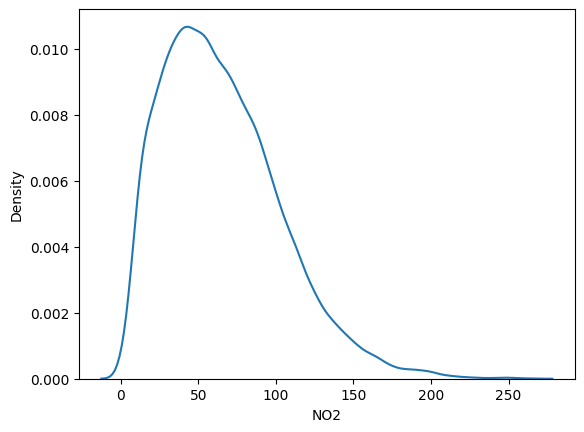

In [ ]:
sns.kdeplot(prsa_data.NO2)

<Axes: xlabel='CO', ylabel='Count'>

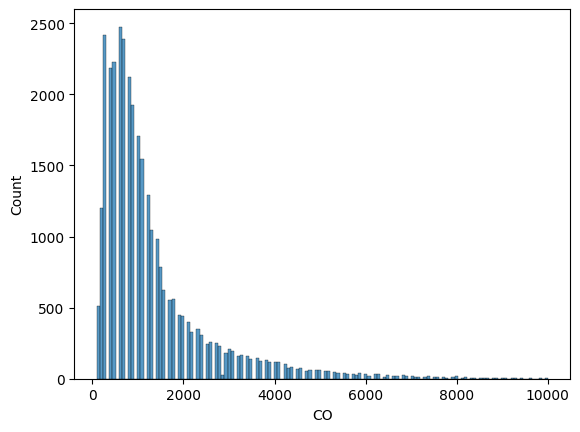

In [ ]:
sns.histplot(prsa_data.CO)

Здесь видно достаточно гладкое распределение с модой в районе 1000.

<Axes: xlabel='O3', ylabel='Count'>

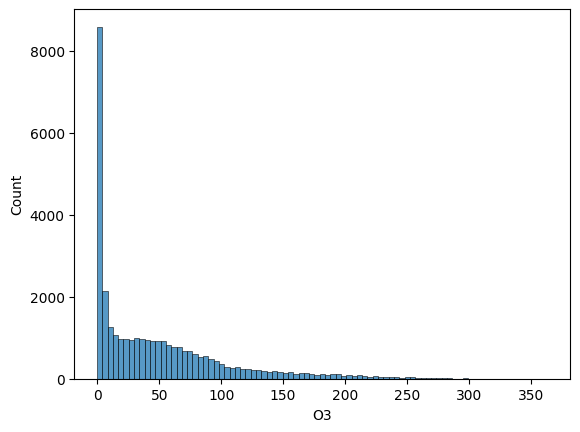

In [ ]:
sns.histplot(prsa_data.O3)

На гистограмме явно видно, что нулевая концентрация встречается гораздо чаще ненулевых значений. В дальнейшем это может быть кандидат на бинаризацию

<Axes: xlabel='PRES', ylabel='Count'>

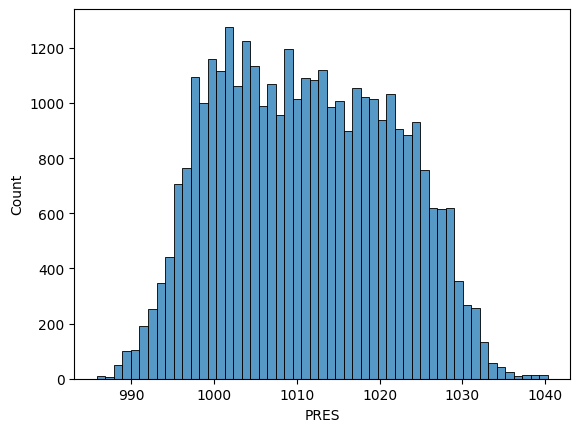

In [ ]:
sns.histplot(prsa_data.PRES)

 есть некоторый диапазон условно равновероятных, "нормальных" значений, а частота значений давления вне этого диапазона быстро спадает. Такие атрибуты тоже можно категоризовывать при необходимости.

<Axes: xlabel='RAIN', ylabel='Count'>

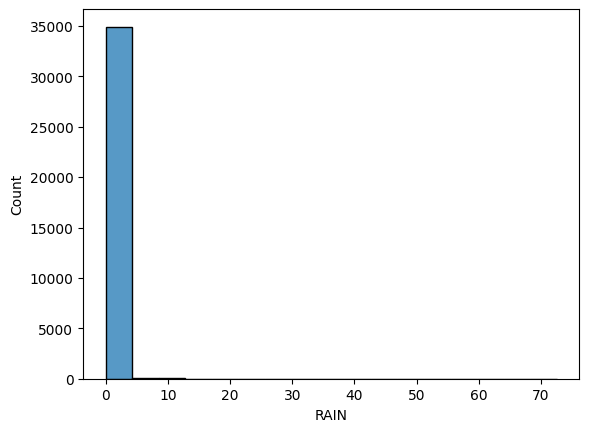

In [ ]:
sns.histplot(prsa_data.RAIN)

Мы видим, что отсутствие осадков - самое распространенное значение. Ненулевые значения тут встречаются в подавляющем меньшинстве точек данных

<Axes: xlabel='WSPM', ylabel='Count'>

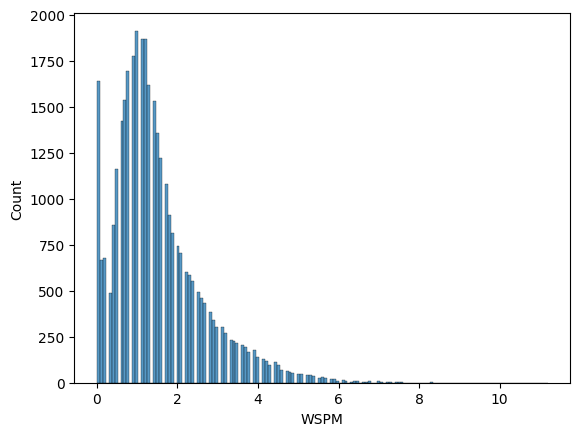

In [ ]:
sns.histplot(prsa_data.WSPM)

**Бинаризация атрибутов**

Такие распределения, как в атрибуте "количество осадков" могут повредить эффективности модели, так как относительное численной значение при таком распределении не несет, по сути, статистической значимости по сравнению с информацией о том, были ли вообще осадки или нет. То есть этот атрибут из численного можно превратить в категориальный.

In [ ]:
prsa_data.RAIN[prsa_data.RAIN > 0]

,RAIN
267,0.1
268,0.4
269,0.1
270,0.9
271,0.9
...,...
34891,0.2
34892,0.7
34893,0.9
34894,0.4


в нашем датасете всего 1436 точек из 35 000 имеют ненулевое значение

Мы можем ввести в модель новый категориальный, а точнее, бинарный атрибут, кодирущий наличие либо отсутствие осадков в данном измерении:

In [ ]:
is_rain = np.array(prsa_data.RAIN)
is_rain[is_rain > 0] = 1
prsa_data['IS_RAIN'] = is_rain
prsa_data.drop(['RAIN'], axis=1, inplace=True)
prsa_data.describe()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,WSPM,IS_RAIN
count,35064.000000,35064.000000,34489.000000,33994.000000,33252.000000,32957.000000,35044.000000,35050.000000,35044.000000
mean,17531.500000,17532.500000,18.376481,65.258789,1319.353513,48.873754,1011.097536,1.501215,0.040977
std,10122.249256,10122.249256,22.609648,37.996088,1268.114331,55.113576,10.355247,1.104472,0.198240
min,0.000000,1.000000,0.285600,1.642400,100.000000,-0.275160,985.900000,0.000000,0.000000
25%,8765.750000,8766.750000,4.000000,36.000000,500.000000,3.579219,1002.500000,0.800000,0.000000
50%,17531.500000,17532.500000,10.000000,60.000000,900.000000,31.945652,1010.800000,1.200000,0.000000
75%,26297.250000,26298.250000,23.000000,88.000000,1600.000000,72.876079,1019.400000,2.000000,0.000000
max,35063.000000,35064.000000,282.000000,264.000000,10000.000000,363.769133,1040.300000,11.200000,1.000000


Визуализация связи атрибутов с целевой переменной

Мы получим на графике несколько линий, каждая из которых соответствует распределению выбранного атрибута при разных значениях целевой переменной

<Axes: xlabel='SO2', ylabel='Density'>

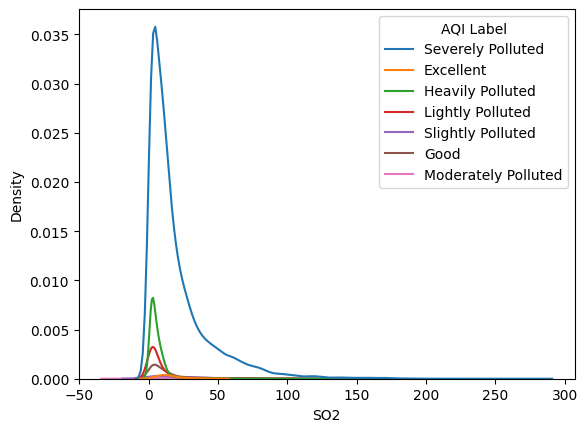

In [ ]:
sns.kdeplot(data=prsa_data, x="SO2", hue="AQI Label")

<Axes: xlabel='NO2', ylabel='Density'>

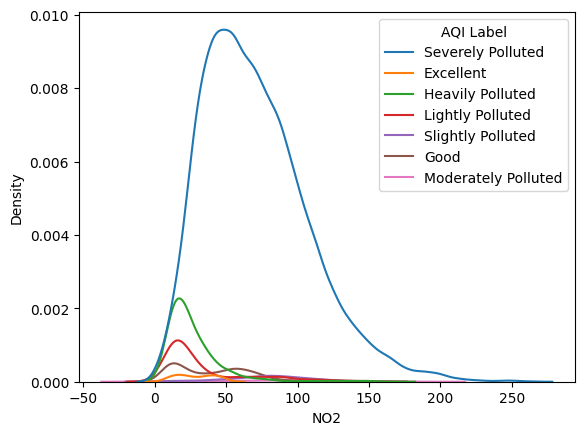

In [ ]:
sns.kdeplot(data=prsa_data, x="NO2", hue="AQI Label")

<ipython-input-27-0dcfe490e9c4>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")


<Axes: xlabel='CO', ylabel='Density'>

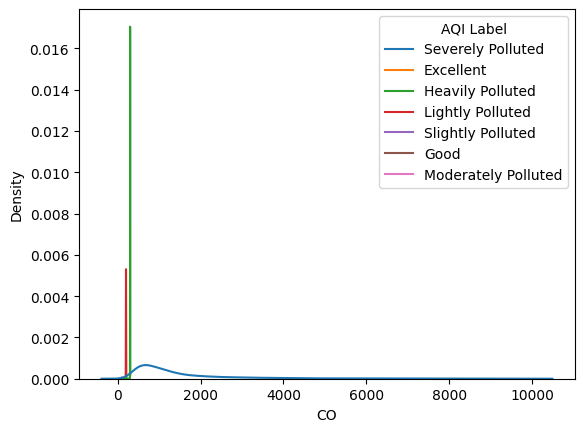

In [ ]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label")

Данный график очень смещен из-за того, что плотности некоторых классов сильно сконцентрированы, что искажает масштаб графика. В таких случаях помогает попробовать изобразить этот же график, но с логарифмическим масштабом вертикальной оси

<ipython-input-28-c5b2a0db864b>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)


<Axes: xlabel='CO', ylabel='Density'>

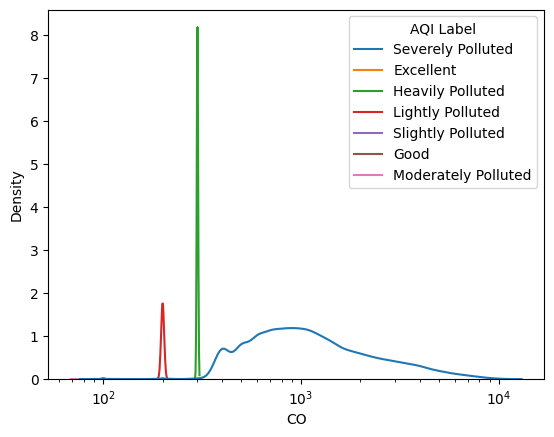

In [ ]:
sns.kdeplot(data=prsa_data, x="CO", hue="AQI Label", log_scale=True)

На некоторых участках диапазона значений данного атрибута преобладает значение "Lightly polluted", на других - "Heavily polluted". Это значит, что данный атрибут очень важен для предсказания значения целевой переменной. В дальнейшем мы используем эту информацию для категоризации этого атрибута

Следующие графики демонстрируют схожее поведение разных классов с поправкой на общую форму распределения разных атрибутов

<Axes: xlabel='O3', ylabel='Density'>

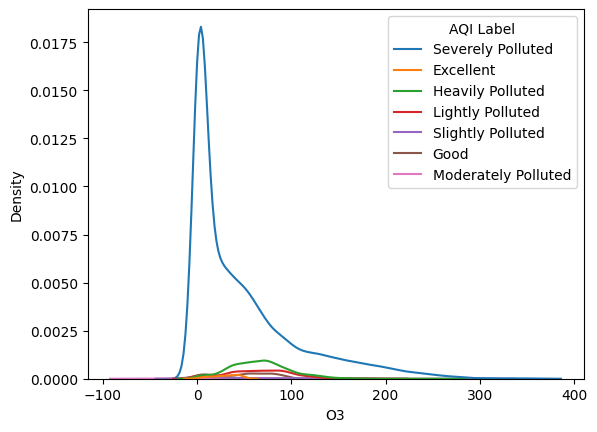

In [ ]:
sns.kdeplot(data=prsa_data, x="O3", hue="AQI Label")

<Axes: xlabel='PRES', ylabel='Density'>

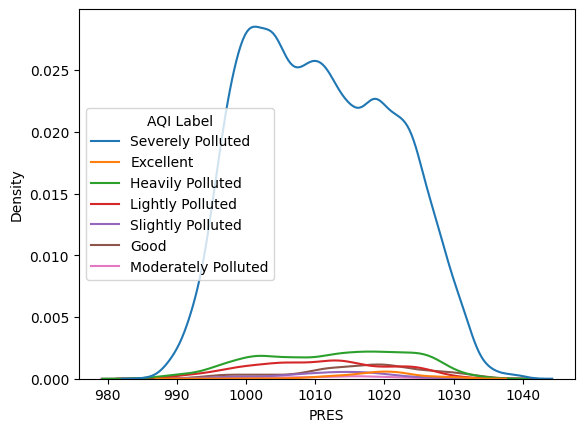

In [ ]:
sns.kdeplot(data=prsa_data, x="PRES", hue="AQI Label")

<Axes: xlabel='WSPM', ylabel='Density'>

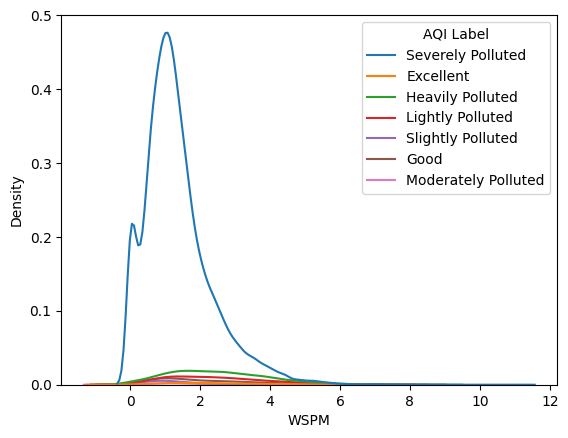

In [ ]:
sns.kdeplot(data=prsa_data, x="WSPM", hue="AQI Label")

**Группировка численных значений**

В данном случае, для значения целевой переменной не так важно конкретное численной значение концентрации CO в воздухе. Достаточно информации, в какой диапазон попадает данное измерение. Поэтому попробуем добавить к датасету атрибут "Группа по CO"

In [ ]:
bin_ranges = [0, 250, 320, 10000]
bin_names = [1, 2, 3]
prsa_data['CO_bin_custom_label'] = pd.cut(np.array(prsa_data['CO']),
                                               bins=bin_ranges, labels=bin_names)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,NaN
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


В данном примере, границы атрибутов мы определяли вручную, по графику выше. Можно их определять автоматически, через изменение долей распределения целевой переменной, либо брать в качестве границ квартили или процентили.

Здесь у нас возникает проблема. Так как в исходном столбце были пропущенные значения, в получившемся столбце тоже будут пропуски. Так как этот новый атрибут - категориальный, проще всего сразу заполнить пропущенные значения специальным названием класса. В данном случае, естественно будет присвоить этому классу метко "0", что будет означать - "значение неизвестно"

In [ ]:
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].values.add_categories(0)
prsa_data['CO_bin_custom_label'] = prsa_data['CO_bin_custom_label'].fillna(0).astype(int)
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.0,28.0,400.0,51.577659,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.0,28.0,400.0,50.403851,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,NaN,19.0,400.0,54.923321,1023.5,NNW,5.6,Severely Polluted,0.0,3
3,3,4,8.0,14.0,NaN,NaN,1024.5,NW,3.1,Excellent,0.0,0
4,4,5,9.0,NaN,300.0,54.296608,1025.2,N,2.0,Heavily Polluted,0.0,2


**Удаление экстремальных значений**

 Объекты, которые нерелевантны решаемой задаче следует удалять из выборки. Но сами по себе длинные "хвосты" распределений могут повредить работе моделей. Поэтому зачастую датасеты с большими выбросами очищают от них автоматически.

Для этого можно удалить объекты, значения определенного атрибута у которых выше или ниже определенного порога или процентиля. Но в таком случае мы лишаемся определенного количества информации, которая была заключена в значении других атрибутов данного объекта. Альтернативный способ - клиппинг. Он заключается в том, что мы заменяем экстремальные значения атрибута граничным.

In [ ]:
prsa_data.loc[prsa_data.PRES <= 992] = 992
prsa_data.loc[prsa_data.PRES >= 1034] = 1034

<Axes: xlabel='PRES', ylabel='Count'>

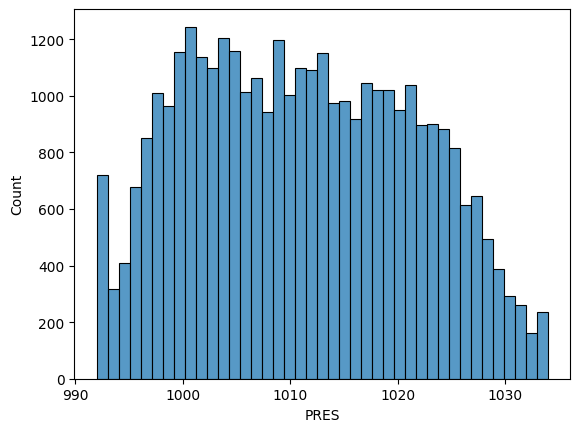

In [ ]:
sns.histplot(prsa_data.PRES)

**Заполнение пропусков**

все реально имеющиеся в данных пропуски отображались в датасете как np.nan или другое детектируемое значение. Это мы уже сделали.

<Axes: >

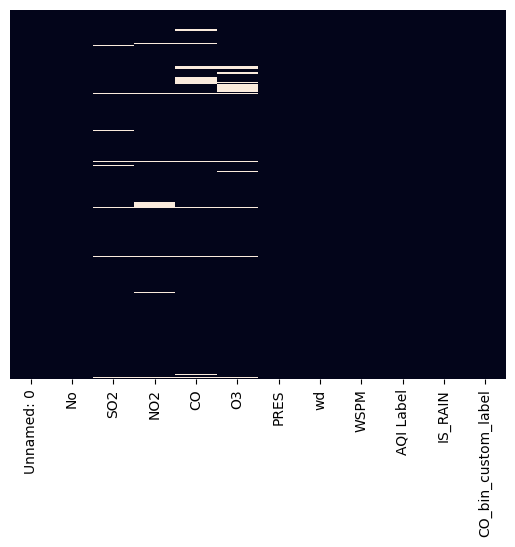

In [ ]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

Можно обратить внимание на то, что в датасете прослеживаются горизонтальные полосы. Это объекты, по которым неизвестны значения нескольких атрибутов. Можно вывести индексы объектов, у которых неизвестно значение более двух атрибутов

In [ ]:
undef = prsa_data.isnull().sum(axis=1)
undef[undef >= 2]

,0
3,2
276,3
435,2
459,2
555,2
...,...
34880,4
34883,4
34885,4
35029,2


Так как такие незаполненные объекты составляют очень малый процент выборки, для простоты обработки их можно просто удалить

In [ ]:
prsa_data = prsa_data.drop(undef[undef >= 2].index, axis=0)

Повторим визуализацию пропусков. Теперь мы видим, что пропуски группируются по столбцам

<Axes: >

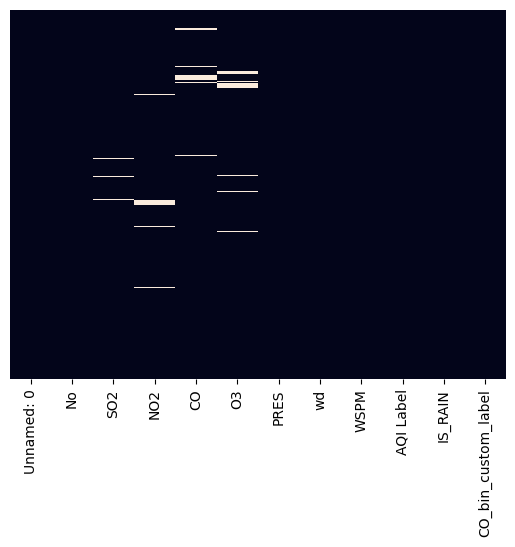

In [ ]:
sns.heatmap(prsa_data.isnull(), yticklabels=False, cbar=False)

Кол-во пропущенных значений для каждого атрибута

In [ ]:
prsa_data.isnull().sum()

,0
Unnamed: 0,0
No,0
SO2,272
NO2,686
CO,1012
O3,1290
PRES,0
wd,0
WSPM,0
AQI Label,0


Мы видим, что пропуски присутствуют в четырех столбцах. При этом в одном из них пропусков сильно меньше

По столбцу SO2 пропущено всего 281 значение. Это менее одного процента выборки. Можно просто заменить пропуски на среднее значение. Но так как эмпирическое распределение этого признака имеет большую асимметрию, лучше использовать медиану

In [ ]:
prsa_data.SO2 = prsa_data.SO2.fillna(prsa_data.PRES.mean())

<Axes: xlabel='SO2', ylabel='Count'>

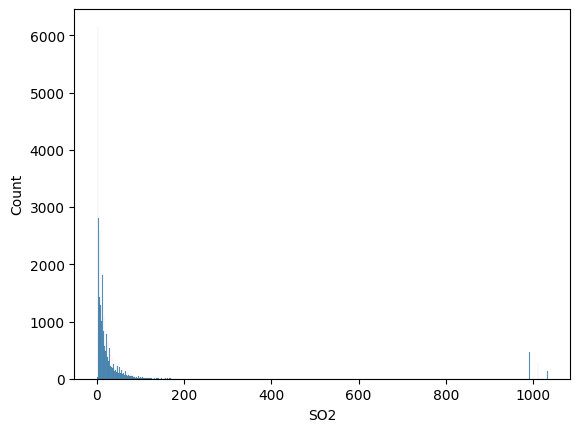

In [ ]:
sns.histplot(prsa_data.SO2)

С другими столбцами, например, O3 искажение будет более существенным. Поэтому воспользуемся заполнением не средним, а случайным значением. Для этого сначала сформируем временную серию, содержащую все пропуски из данного столбца

In [ ]:
filler = prsa_data.O3[prsa_data.O3.isna()]

Нам важно, чтобы в этой серии сохранился исходный индекс - номера строк с пропусками исходного датасета. Это мы используем при заполнении этой серии данными. В этом примере не будем генерировать случайные значения их какого-то распределения, а просто семплируем их из существующих значений

In [ ]:
filler = prsa_data.O3[~prsa_data.O3.isna()].sample(n=len(filler)).set_axis(filler.index)

In [ ]:
display(filler)

,O3
436,56.758254
460,17.467618
556,78.373893
652,47.793493
748,46.445254
...,...
33124,53.260690
33220,204.199932
33604,20.051318
33892,56.431941


Теперь просто воспользуемся ей для заполнения пропусков в исходном датасете

In [ ]:
prsa_data.O3 = prsa_data.O3.fillna(filler)

<Axes: xlabel='O3', ylabel='Count'>

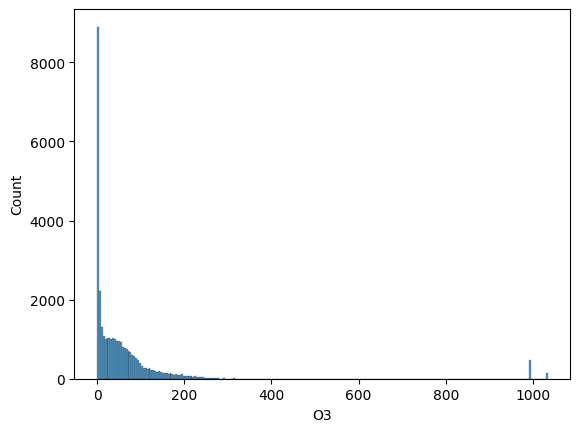

In [ ]:
sns.histplot(prsa_data.O3)

**Округление атрибутов**

При визуальном осмотре датасета можно заметить, что все численные значения имеют один знак после запятой. Но столбец O3 записан с гораздо большей точностью - 5 знаков после запятой. Такая точность является избыточной, так как получается, что в этой колонке записаны 7 значащих цифр. От лишних данных можно избавиться, просто округлив данные значения

In [ ]:
prsa_data['O3'] = np.array(np.round((prsa_data['O3'])), dtype='int')
prsa_data.head()

,Unnamed: 0,No,SO2,NO2,CO,O3,PRES,wd,WSPM,AQI Label,IS_RAIN,CO_bin_custom_label
0,0,1,6.00000,28.0,400.0,52,1023.0,NNW,4.4,Severely Polluted,0.0,3
1,1,2,6.00000,28.0,400.0,50,1023.2,N,4.7,Severely Polluted,0.0,3
2,2,3,1011.05387,19.0,400.0,55,1023.5,NNW,5.6,Severely Polluted,0.0,3
4,4,5,9.00000,NaN,300.0,54,1025.2,N,2.0,Heavily Polluted,0.0,2
5,5,6,8.00000,17.0,300.0,54,1025.6,N,3.7,Heavily Polluted,0.0,2


**Логарифмирование атрибутов**

Еще один прием, который не часто применяется, но иногда бывает полезен - кастомное решкалирование значений. В целом, решкалирование - это изменение шкалы измерения атрибута. Например, изменение граничных значений, масштабирование, нормализация. Но в определенных случаях, может быть полезно применить и другое преобразование данных. Опять обратим внимание на столбец SO2. Сейчас его значения очень сильно смещены. Малых значений очень много, а значит, что даже маленькие разницы между ними могут быть существенны для модели. А вот больших значений очень мало, и даже большие расстояния между ними могут быть не очень показательны.

In [ ]:
prsa_data.SO2 = np.log(prsa_data.SO2)

<Axes: xlabel='SO2', ylabel='Count'>

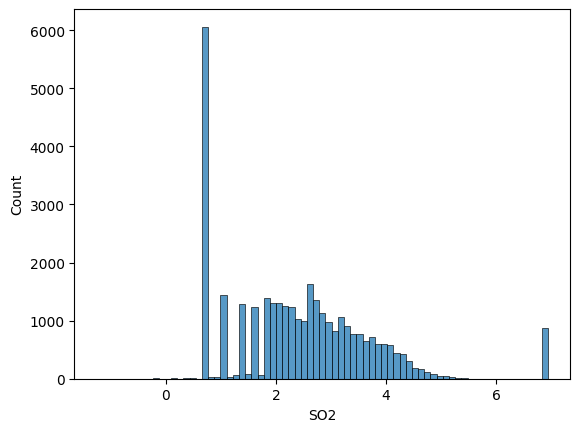

In [ ]:
sns.histplot(prsa_data.SO2)

При таком равномерном распределении информации модели будет легче работать с этим признаком